
<!-- ---------------------------------------------------- -->
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Pandas Tutorial -->  
	  <center>
	    <br>
 <h1>Proyecto Análisis de Datos de La Liga 2019 - 2020</h1>
        <br>
        <br>
        <strong> Análisis de Datos con Python</strong></a>
	  </center>
    <!-- Pandas Tutorial -->

  </div>
<!-- ---------------------------------------------------- -->


La temporada *2019-20 de La Liga*, fue la 89ª desde su creación. *Esta fue la segunda temporada de La Liga con VAR*.

Como en temporadas anteriores, consta de un grupo único integrado por veinte clubes de toda la geografía española. Siguiendo un sistema de liga, los veinte equipos se enfrentarán todos contra todos en dos ocasiones, una en campo propio y otra en campo contrario, sumando un total de 38 jornadas. El orden de los encuentros se decidió por sorteo antes de empezar la competición.

 A falta de una jornada para el final, el Real Madrid se coronó campeón por trigesimocuarta vez en su historia.
   
* **SOBRE EL PROYECTO:**

En este proyecto analizaremos el patrón en los datos que nos ayudarán a obtener más información sobre la temporada de La Liga.

---

### 1. Importación de Librerías:
Importa las siguientes librerías:
   * numpy : para operaciones.
   * pandas: para manipulación de datos
   * ipywidgets: añadir interactividad a las tablas
   * IPython.display: mostrar tablas html

In [82]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, HTML
import matplotlib.pyplot as plt

### 2. Los Datos:

El conjunto de datos contiene información sobre todos y cada uno de los partidos jugados en la temporada de La Liga 2019-20, y con la ayuda de los datos intentaremos obtener información sobre la temporada.
  
  El conjunto de datos se descarga desde: http://football-data.co.uk/data.php

* La data contiene los siguientes campos:

    * Div : División (Primera, Segunda) como he descargado sólo el de 1ra siempre aparecerá 1
    * Date : Día del Partido (dd/mm/yy)
    * HomeTeam : Equipo Local
    * AwayTeam : Equipo Visitante
    * FTHG : (Full Time Home Team Goals) Goles de Local en el tiempo completo
    * FTAG : (Full Time Away Team Goals) Goles de Visitante en el tiempo completo
    * FTR : (Full Time Result) Resultado Final en tiempo Completo (H=Home Win, D=Draw, A=Away Win)
    * HTHG : (Half Time Home Team Goal) Goles del equipo local al medio tiempo
    * HTAG : (Half Time Away Team) Goals Goles del equipo visitante al medio tiempo
    * HTR : (Half Time Result) Resultado en el medio tiempo (H=Home Win, D=Draw, A=Away Win)
    * HS : (Home Team Shots) Remates equipo local
    * AS : (Away Team Shots) Remates equipo visitante
    * HST : (Home Team Shots on Target) Remates equipo local al arco
    * AST : (Away Team Shots on Target) Remates equipo visitante al arco
    * HF : (Home Team Fouls) Faltas Cometidas equipo local
    * AF : (Away Tema Fouls) Faltas Cometidas equipo visitante
    * HC : (Home Team Corners) Corners equipo local
    * AC : (Away Team Corners) Corners equipo visitante
    * HY : (Home Team Yellow Cards) Tarjetas Amarillas equipo local
    * AY : (Away Team Yellow Cards) Tarjetas Amarillas equipo visitante
    * HR : (Home Team Red Cards) Tarjetas Rojas equipo local
    * AR : (Away Team Red Cards) Tarjetas Rojas equipo visitante
    

* Nota: No estamos incluyendo las * columnas de apuestas * en nuestro proyecto.

* **Leer los datos del archivo laliga2019_2020.csv.**

In [2]:
df = pd.read_csv("laliga2019_2020.csv")

* **Usa las funciones básicas para ver el conjunto de datos y la información sobre el conjunto de datos.**

In [14]:
df.info()
print(df.columns[:22])
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Columns: 105 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(7)
memory usage: 311.8+ KB
Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR'],
      dtype='object')


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,16/08/2019,20:00,Ath Bilbao,Barcelona,1,0,H,0,0,...,1.97,0.75,1.93,2.00,1.91,2.01,2.02,2.03,1.91,1.98
1,SP1,17/08/2019,16:00,Celta,Real Madrid,1,3,A,0,1,...,2.63,1.00,1.82,1.97,1.85,2.07,2.00,2.20,1.82,2.06
2,SP1,17/08/2019,18:00,Valencia,Sociedad,1,1,D,0,0,...,1.82,-0.75,1.94,1.99,1.92,2.00,1.96,2.12,1.89,2.00
3,SP1,17/08/2019,19:00,Mallorca,Eibar,2,1,H,1,0,...,1.66,0.00,2.11,1.82,2.09,1.83,2.12,1.88,2.07,1.83
4,SP1,17/08/2019,20:00,Leganes,Osasuna,0,1,A,0,0,...,1.46,-0.50,1.89,2.04,1.90,2.01,1.95,2.06,1.90,1.99


* **Seleccionar las mejores columnas del conjunto de datos:**

    * Como solo queremos las primeras 22 columnas, todas las otras columnas son básicamente las columnas de apuestas.
    * Entonces dividiremos el marco de datos que nos dará el conjunto de datos que tiene las primeras 22 columnas.

In [16]:
new_liga = df.iloc[:,:22]
print(new_liga)

     Div        Date   Time    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0    SP1  16/08/2019  20:00  Ath Bilbao    Barcelona     1     0   H     0   
1    SP1  17/08/2019  16:00       Celta  Real Madrid     1     3   A     0   
2    SP1  17/08/2019  18:00    Valencia     Sociedad     1     1   D     0   
3    SP1  17/08/2019  19:00    Mallorca        Eibar     2     1   H     1   
4    SP1  17/08/2019  20:00     Leganes      Osasuna     0     1   A     0   
..   ...         ...    ...         ...          ...   ...   ...  ..   ...   
375  SP1  19/07/2020  20:00     Granada   Ath Bilbao     4     0   H     1   
376  SP1  19/07/2020  20:00     Leganes  Real Madrid     2     2   D     1   
377  SP1  19/07/2020  20:00     Levante       Getafe     1     0   H     0   
378  SP1  19/07/2020  20:00     Osasuna     Mallorca     2     2   D     1   
379  SP1  19/07/2020  20:00     Sevilla     Valencia     1     0   H     0   

     HTAG  ...  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  
0   

### Revisar el tipo de dato y si hay datos nulos de las columnas

In [34]:
print(new_liga.isnull().sum())
print(new_liga.dtypes)

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
dtype: int64
Div                 object
Date        datetime64[ns]
Time                object
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG                 int64
HTAG                 int64
HTR                 object
HS                   int64
AS                   int64
HST                  int64
AST                  int64
HF                   int64
AF                   int64
HC                   int64
AC                   int64
HY                   int64
AY                   int64
HR                   int64
dtype: object


* Hay un total de 380 filas, lo que significa que se jugaron 380 partidos en toda la temporada.
    * El dataframe contiene 22 columnas: 16 tienen valores enteros y 6 tienen valores de texto.
    * Ninguna columna tiene valores de NaN.

### Ver resumen de estadísticas del dataframe

In [22]:
new_liga.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.436842,1.042105,0.602632,0.450000,12.463158,10.136842,4.336842,3.510526,13.663158,13.789474,5.042105,4.194737,2.547368,2.584211,0.100000
std,1.199697,1.029033,0.829848,0.673764,4.690552,4.080614,2.438091,1.959321,4.214839,3.935884,2.676649,2.322080,1.549659,1.480128,0.333685
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,11.000000,11.000000,3.000000,2.750000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,4.000000,3.000000,13.000000,13.000000,5.000000,4.000000,2.000000,2.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,15.000000,12.250000,6.000000,5.000000,16.000000,16.000000,7.000000,6.000000,4.000000,4.000000,0.000000
max,6.000000,5.000000,4.000000,3.000000,25.000000,24.000000,17.000000,12.000000,28.000000,30.000000,14.000000,12.000000,7.000000,8.000000,2.000000


* **Borra la columna Div que indica la primera división.**

In [26]:
new_liga.drop("Div", axis=1)

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,16/08/2019,20:00,Ath Bilbao,Barcelona,1,0,H,0,0,D,...,11,5,2,14,9,3,8,1,1,0
1,17/08/2019,16:00,Celta,Real Madrid,1,3,A,0,1,A,...,17,4,11,17,12,6,4,5,2,0
2,17/08/2019,18:00,Valencia,Sociedad,1,1,D,0,0,D,...,12,6,3,13,14,3,3,4,4,1
3,17/08/2019,19:00,Mallorca,Eibar,2,1,H,1,0,H,...,11,4,5,13,14,9,3,2,3,0
4,17/08/2019,20:00,Leganes,Osasuna,0,1,A,0,0,D,...,4,2,2,17,11,8,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,19/07/2020,20:00,Granada,Ath Bilbao,4,0,H,1,0,H,...,11,6,3,10,11,2,3,1,2,0
376,19/07/2020,20:00,Leganes,Real Madrid,2,2,D,1,1,D,...,7,7,4,9,11,5,2,4,1,0
377,19/07/2020,20:00,Levante,Getafe,1,0,H,0,0,D,...,13,4,4,10,12,6,8,2,4,0
378,19/07/2020,20:00,Osasuna,Mallorca,2,2,D,1,1,D,...,12,5,4,17,10,3,5,2,0,0


* **Revisa el tipo de dato de la columna Date.**

In [27]:
new_liga.dtypes["Date"]

dtype('O')

 * **cambia el tipo de dato a timestamp object con to_datetime**

In [32]:
dayfirst=True
new_liga["Date"] = pd.to_datetime(new_liga["Date"])


* **Revisa nuevamente el tipo de dato de la columna Date.**

In [33]:
new_liga.dtypes["Date"]

dtype('<M8[ns]')

* **Crear 3 nuevas columnas:**
    * Goles en casa en la segunda mitad (SHHG)
    * Goles de vistante en la segunda mitad (SHAG)
    * Resultado de la segunda mitad (SHR)

In [40]:
new_liga["SHHG"] = new_liga["FTHG"] - new_liga["HTHG"]
print(new_liga["SHHG"])

0      1
1      1
2      1
3      1
4      0
      ..
375    3
376    1
377    1
378    1
379    1
Name: SHHG, Length: 380, dtype: int64


In [41]:
new_liga["SHAG"] = new_liga["FTAG"] - new_liga["HTAG"]
print(new_liga["SHAG"])

0      0
1      2
2      1
3      1
4      1
      ..
375    0
376    1
377    0
378    1
379    0
Name: SHAG, Length: 380, dtype: int64


In [53]:
condiciones = [(new_liga["SHHG"] > new_liga["SHAG"]), (new_liga["SHHG"] == new_liga["SHAG"]), (new_liga["SHHG"] < new_liga["SHAG"])] 
valores = ['H', 'D', 'A']
new_liga["SHR"] = np.select(condiciones, valores, default= "otros")

print(new_liga["SHR"])

0      H
1      A
2      D
3      D
4      A
      ..
375    H
376    D
377    H
378    D
379    H
Name: SHR, Length: 380, dtype: object


In [59]:
"""print(new_liga["SHHG"], new_liga["SHAG"], new_liga["SHR"])"""
print(new_liga[["SHHG", "SHAG", "SHR"]])

     SHHG  SHAG SHR
0       1     0   H
1       1     2   A
2       1     1   D
3       1     1   D
4       0     1   A
..    ...   ...  ..
375     3     0   H
376     1     1   D
377     1     0   H
378     1     1   D
379     1     0   H

[380 rows x 3 columns]


* El proceso de limpieza de datos se ha realizado. Ahora podemos avanzar y hacer la tabla de la liga basada en el conjunto de datos que tenemos.


### Total de partidos jugados en la temporada

In [60]:
new_liga.shape[0]

380

### Porcentajes de partidos ganados por el equipo local, empatados y ganados por el equipo visitante

In [74]:
porcentaje = new_liga["FTR"].value_counts("H")*100

### Crea un dataframe con una columna partidos que diga: (ganados, empatados o perdidados) y  otro con el porcentaje de la anterior celda

In [81]:

df_Partidos = pd.DataFrame({"Partidos": ["Ganado", "Empatado", "Perdido"], "Porcentaje": porcentaje}).reset_index().drop(columns="FTR")
print(df_Partidos)

   Partidos  Porcentaje
0    Ganado   45.789474
1  Empatado   27.631579
2   Perdido   26.578947


### Crear una pie chart con pandas del anterior dataframe

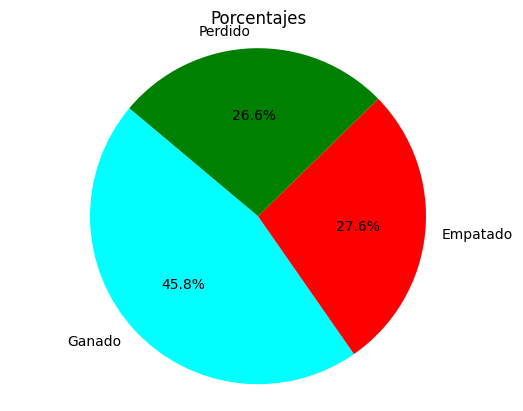

In [86]:
plt.pie(df_Partidos["Porcentaje"], labels=df_Partidos["Partidos"], colors=["Cyan","Red","Green"], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Porcentajes') 
plt.show()


### Cantidad de Goles por Partido de local, visitante de todos los equipos y por partido

In [98]:
new_liga["Local"] = new_liga.groupby(["HomeTeam"])["FTHG"].sum()
new_liga["Visitante"] = new_liga.groupby(["AwayTeam"])["FTAG"].sum()
new_liga["Goles"] = (new_liga["Local"] + new_liga["Visitante"]) / 36
print(new_liga[["Local", "Visitante", "Goles"]])

     Local  Visitante  Goles
0      NaN        NaN    NaN
1      NaN        NaN    NaN
2      NaN        NaN    NaN
3      NaN        NaN    NaN
4      NaN        NaN    NaN
..     ...        ...    ...
375    NaN        NaN    NaN
376    NaN        NaN    NaN
377    NaN        NaN    NaN
378    NaN        NaN    NaN
379    NaN        NaN    NaN

[380 rows x 3 columns]


### Crea un dataframe con una columna partidos que diga: Local y Visitante y otra columna con la cantidad de goles marcandos

### Crear una pie chart con pandas del anterior dataframe

### Remates equipo local y visitante y remates a puerta equipo local y visitante

### Crear una bar chart con pandas del anterior dataframe

### Real Madrid porcentaje de Victoria,Empates y Derrotas

#### Crea otro dataframe con el filtro de Real Madrid como equipo local y otro dataframe con las columnas del real madrid como visitante

### Contar la cantidad de juegos ganados tanto de local, como visitante por el Real Madrid

### Lista los nombres de los clubes de la liga española

### Usar ipywidgets para mostrar y filtrar los juegos de local de cada equipo de la liga

### Usar ipywidgets para mostrar y filtrar la cantidad de juegos que ganó cada equipo de la liga

### 3. La Tabla de Liga:

* La tabla de la liga incluirá las siguientes columnas:
    * Club: nombre del club.
    * MP: total de partidos jugados.
    * W: número total de victorias.
    * D: número total de empates.
    * L: número total de derrotas.
    * GF: número total de goles marcados.
    * GA: número total de goles recibidos.
    * GD: diferencia de goles (GF-GA).
    * Pts: puntos totales.

### Correr la siguiente celda con la función *'crear_tabla'*

In [ ]:
#clubes de la liga en un array
clubs = laliga['HomeTeam'].unique()

def crear_tabla(clubs, df, side):
    ## side = home/away/all
    ## home = para crear una tabla de los partidos locales de la liga
    ## away =  para crear una tabla de los partidos visitante de la liga
    ## all = para crear una tabla de todos los valores de la liga

    #diccionario que incluirá la información de cada club
    league_table = dict()

    for club in clubs:
        ## iterar a través del club y completar los valores en el diccionario league_table
        ## match played, win, draw, lose, goals for, goals against, goal difference, clean sheets, points
        mp, w, d, l, gf, ga, gd, cs, pts = 0, 0, 0, 0, 0, 0, 0, 0, 0


        ## recorrerá todo el conjunto de datos y calculará todos los resultados
        for i in range(len(df)):
            ## la cláusula if-else verificará las condiciones para los equipos locales y visitantes
            ## y según la condición calculará los resultados requeridos
            ## cuando el club es un equipo local
            ## el parámetro de side es para checkear si es unaa tabla de local o no
            if df.iloc[i]['HomeTeam'] == club and (side == 'home' or side == 'all'):

                if df.iloc[i]['FTR'] == 'H':
                    #cuando el equipo local gana, se suma 1 victoria y 3 puntos
                    w += 1
                    pts += 3

                elif df.iloc[i]['FTR'] == 'A':
                    l += 1
                #cuando el equipo visitante gana, se suma 1 derrota y 0 puntos

                else:
                 #cuando se empata, se suma 1 empate y 0 puntos

                    d += 1
                    pts += 1

                ##calculando los goles a favor y los goles en contra
                gf += df.iloc[i]['FTHG']
                ga += df.iloc[i]['FTAG']


                 ## calculando los partidos con portería a 0
                if df.iloc[i]['FTAG'] == 0:
                    cs += 1

                ## incrementar la cantidad de partidos jugados
                mp += 1


            # cuando el club es un equipo visitante
            ## el parámetro de side es para checkear si es unaa tabla de visitante o no

            elif df.iloc[i]['AwayTeam'] == club and (side == 'away' or side == 'all'):

                if df.iloc[i]['FTR'] == 'H':
                    #cuando el equipo local gana, se suma 1 derrota  y 0 puntos
                    l += 1

                elif df.iloc[i]['FTR'] == 'A':
                   #cuando el equipo local pierde, se suma 1 victoria y 3 puntos
                    w += 1
                    pts += 3

                else:
                #cuando se empata, se suma 1 empate y 0 puntos

                    d += 1
                    pts += 1

                ##calculando los goles a favor y los goles en contra

                gf += df.iloc[i]['FTAG']
                ga += df.iloc[i]['FTHG']


                ## calculando los partidos con portería a 0
                if df.iloc[i]['FTHG'] == 0:
                    cs += 1

                ## incrementar la cantidad de partidos jugados
                mp += 1

        #calculando la diferencia de gol
        gd = gf - ga

        ## colocando todos los parámetros en un diccionario con una llave que es el nombre del club
        league_table[club] = {'MP': mp, 'W': w, 'D': d, 'L': l, 'GF': gf, 'GA': ga, 'GD': gd, 'CS': cs, 'PTS': pts}

    #diccionario con los datos anteriores calculados
    return league_table

### Asigna a  la función crear_tabla(clubs, laliga, side='all') en una variable tabla_liga e imprimela

### Crear un dataframe llamado tabla_liga_df con el diccionario tabla_liga

### Convertir columnas en filas y filas en columnas, usando .transpose()

### Convierte el Club en una columna y resetea índice

### Ordena los valores por la columna PTS y Goles de Diferencia (GD)  y resetea los indices

### Aplicale color amarillo a valores más elevados

---

### 4. Análisis de datos exploratorios (EDA):

* **Muestra los 4 equipos clasificados a la UEFA Champions League(UCL).**

* **Muestra los 3 equipos calificados a la UEFA Europa League(UEL).**

* **Muestra los 3 equipos desendidos**

#### Utiliza iterrows() para guardar en un vector los clasificados a Champions League, Europa League, los Descendidos o no va a competiciones europeas

#### Crea una función que reciba una fila y que retorne si está clasificado en equipo en Champions League, Europa League, Descendido o no va a competiciones europeas

#### Aplique la función anterior con un apply y cre una columna llamada CE (Competiciones Europeas)

* **5 equipos con mayor número de goles**

* **5 equipos con menor número de goles**

* **5 equipos con mayor portería a 0.**

* **Los cinco mejores equipos que concedieron la mayor cantidad de goles**

* ## **Tabla Local y Tabla Visitante**

### Asigna la fución crear_tabla(clubs, laliga, side='home') en una variable llamada tabla_local e imprimela

## Realiza el mismo preprocesamiento que con tabla_liga_df

* Crear un dataframe llamado tabla_local_df con el diccionario tabla_local
* transponer el dataframe tabla_local
* Colocar el index Club como una nueva columna y reseteear el index como numérico
* Ordenar el dataframe por puntos y goles de diferencia de mayor a menor
* Resetear los índices con el dataframe ordenado


### Realiza lo mismo anterior pero con side='away' en la funcion  crear_tabla(clubs, laliga, side='away'). Usar de variable tabla_visitante y tabla_visitante_df

In [ ]:
def multi_table(table_list):
    return HTML(
        '<table><tr style="background-color:white;">' +
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )
multi_table([tabla_local_df, tabla_visitante_df])

* ***Conclusion***:  Todos los equipos cuando jugaron sus partidos fuera de casa, perdieron puntos, en comparación a jugar de local

<br>

### Promedio de goles marcados por cada equipo en el primer tiempo

#### Agrupa por equipo local y suma los goles anotados **SOLO HASTA EL MEDIO TIEMPO**. Luego transforma la serie a Dataframe

#### Agrupa por equipo visitante y suma los goles anotados **SOLO HASTA EL MEDIO TIEMPO**. Luego transforma la serie a Dataframe

#### Unir ambos dataframes con join y guardarlos en una variable llamada: *media_goles_primer_tiempo*

#### Crea una columna llamada Suma de Goles con la suma de las dos columnas de media_goles_primer_tiempo

#### Divide media_goles_primer_tiempo['Suma de Goles'] entre 38 partidos y guardarlos en una columna *Promedio de Goles Primer Tiempo*

#### Ordena el dataframe de mayor a menor por *Promedio de Goles Primer Tiempo*

### Promedio de goles marcados por cada equipo en el segundo tiempo (Realizar los mismos pasos que el dataframe anterior, solo que ahora con los datos del segundo tiempo)

#### Agrupa por equipo local y suma los goles anotados **SOLO LOS DEL SEGUNDO TIEMPO**. Luego transforma la serie a Dataframe. Hacer lo mismo con los de visitante

#### Join de los dos dataframes anteriores y nómbralo  *media_goles_segundo_tiempo*

#### Crea una columna llamada Suma de Goles con la suma de las dos columnas de media_goles_segundo_tiempo

#### Divide media_goles_segundo_tiempo['Suma de Goles'] entre 38 partidos y guardarlos en una columna *Promedio de Goles Segundo Tiempo*

#### Ordena el dataframe de mayor a menor por *Promedio de Goles Segundo Tiempo*

## Usa la función *multi_table* creada anteriormente y coloca como parámetros  media_goles_primer_tiempo[['Promedio de Goles Primer Tiempo']] y media_goles_segundo_tiempo[['Promedio de Goles Segundo Tiempo']]]

In [ ]:
def multi_table(table_list):
    return HTML(
        '<table><tr style="background-color:white;">' +
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )
multi_table([media_goles_primer_tiempo, media_goles_segundo_tiempo])

* **¿Qué conclusiones puedes obtener? A la vista de estos datos ¿parece lógica la clasificación final**:
